In [121]:
from __future__ import print_function
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

Importing all the necessary libraries.
Tensors are like numpy arrays but they can be used GPUs for faster computing

In [60]:
x = torch.Tensor(4, 2)
print(x)


 4.5805e+02  3.0921e-41
 1.8526e-04  1.7376e-04
 4.6781e-05  1.8019e+02
 6.6406e-07  1.2558e+04
[torch.FloatTensor of size 4x2]



Create a randomly initialized matrix

In [61]:
x = torch.rand(7, 3)
print(x)


 0.7600  0.7397  0.8353
 0.4769  0.9136  0.4552
 0.1267  0.2021  0.5641
 0.4905  0.7472  0.9745
 0.7670  0.0227  0.7644
 0.9911  0.2391  0.4042
 0.7167  0.0750  0.1893
[torch.FloatTensor of size 7x3]



In [62]:
print(x.size()) # Tensor.size() returns a tuple

torch.Size([7, 3])


In [63]:
y = torch.rand(7, 3)
result = torch.Tensor(7, 3)
time = datetime.datetime.now()
finish = datetime.datetime.now()
print(x + y)
print('Time taken: ' + str((finish - time) * 1000) + 'ms')

torch.add(x, y, out=result)
print(result)

result.add_(x)
print(result)


 0.7700  1.4418  1.4172
 0.7907  1.8661  1.0964
 0.8176  1.0470  0.7077
 1.0517  1.6123  1.9008
 0.7911  0.1222  0.8874
 1.1179  0.6545  0.8889
 1.4751  0.6768  0.8606
[torch.FloatTensor of size 7x3]

Time taken: 0:00:00.016000ms

 0.7700  1.4418  1.4172
 0.7907  1.8661  1.0964
 0.8176  1.0470  0.7077
 1.0517  1.6123  1.9008
 0.7911  0.1222  0.8874
 1.1179  0.6545  0.8889
 1.4751  0.6768  0.8606
[torch.FloatTensor of size 7x3]


 1.5300  2.1814  2.2525
 1.2676  2.7797  1.5516
 0.9443  1.2491  1.2718
 1.5422  2.3595  2.8753
 1.5581  0.1449  1.6518
 2.1090  0.8936  1.2931
 2.1918  0.7517  1.0500
[torch.FloatTensor of size 7x3]



#### Any operation that ends with ```_``` will mutate a tensor

In [35]:
print(x[:,2])


 0.8349
 0.9978
 0.5313
 0.2886
 0.5780
 0.3725
 0.8183
[torch.FloatTensor of size 7]



To reshape any tensor we can use ```torch.view```

In [36]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


## Converting Tensors to numpy Arrays

In [46]:
a = torch.ones(5)
print(a)
print(type(a))


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

<class 'torch.FloatTensor'>


In [47]:
b = a.numpy()
print(b)
print(type(b))

[ 1.  1.  1.  1.  1.]
<class 'numpy.ndarray'>


In [48]:
a.add_(1)
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


### Numpy array changed when we changed the tensor value

In [50]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



### Tensor value will also change when numpy array is changed

## CUDA Tensors

In [70]:
time = datetime.datetime.now()
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    print(x + y)
finish = datetime.datetime.now()

print('Time taken: ' + str((finish - time) * 1000) + 'ms')


 0.7700  1.4418  1.4172
 0.7907  1.8661  1.0964
 0.8176  1.0470  0.7077
 1.0517  1.6123  1.9008
 0.7911  0.1222  0.8874
 1.1179  0.6545  0.8889
 1.4751  0.6768  0.8606
[torch.cuda.FloatTensor of size 7x3 (GPU 0)]

Time taken: 0:00:03.759000ms


## Automatic Differentiation

In [73]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [76]:
y = x + 2
print(y)
print(y.grad_fn)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [77]:
z = y * y * 3
out = z.mean()

print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



### Backprop

In [78]:
out.backward()
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [92]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

Variable containing:
  770.1751
  608.7219
 1091.2278
[torch.FloatTensor of size 3]



In [93]:
gradients = torch.FloatTensor([0.1, 1.0, 0.001])
y.backward(gradients)

print(x.grad)

Variable containing:
  51.2000
 512.0000
   0.5120
[torch.FloatTensor of size 3]



## Neural Networks

In [96]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #Conv Layers
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        #Fully connected layers 
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        #Max pool over a (2, 2) filter/windows size
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        
        #If the size is a square you can pass in a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        
        return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d (1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


In [97]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [105]:
input_vals = Variable(torch.randn(1, 1, 32, 32))
output = net(input_vals)
target = Variable(torch.arange(1, 11))
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

Variable containing:
 37.9590
[torch.FloatTensor of size 1]



In [106]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

In [107]:
net.zero_grad() # Zeros all the gradient values of all the parameters
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
 0.0576
-0.0123
-0.1749
-0.0136
 0.0172
 0.1156
[torch.FloatTensor of size 6]



In [109]:
learning_rate = 0.01
# f.data.sub_(f.grad.data * learning_rate)
# Probably want to use something much more efficient than
# SGD like Adam or Momentum or RMS Prop

#Create the optimizer
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

optimizer.zero_grad()
output = net(input_vals)
loss = criterion(output, target)
loss.backward()
optimizer.step()

## Training a Classifier

### Get the data

In [130]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                              shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                          download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                            shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


truck  deer  deer truck


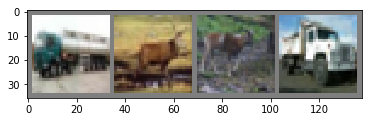

In [131]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Define a CNN

In [151]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

net = Net()

### Define a Loss Function and an Optimizer

In [152]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.194
[1,  4000] loss: 1.841
[1,  6000] loss: 1.674
[1,  8000] loss: 1.561
[1, 10000] loss: 1.507
[1, 12000] loss: 1.436
[2,  2000] loss: 1.382
[2,  4000] loss: 1.360
[2,  6000] loss: 1.320
[2,  8000] loss: 1.315
[2, 10000] loss: 1.304
[2, 12000] loss: 1.262
Finished Training


### Test the network on the test data

GroundTruth:  [ ' c a t ' ,   ' s h i p ' ,   ' s h i p ' ,   ' p l a n e ' ]


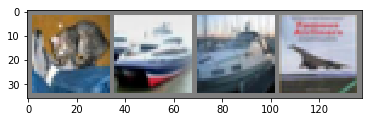

In [153]:
dataiter = iter(testloader)
images, labels = dataiter.next()

#print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('{0}'.format([classes[labels[j]] for j in range(4)])))

In [154]:
outputs = net(Variable(images))

In [155]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('{}'.format([classes[predicted[j]] for j in range(4)])))

Predicted:  [ ' c a t ' ,   ' s h i p ' ,   ' c a r ' ,   ' p l a n e ' ]


In [156]:
correct = 0
total = 0

for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: {} %%'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 55.01 %%


In [157]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 64 %
Accuracy of   car : 77 %
Accuracy of  bird : 38 %
Accuracy of   cat : 36 %
Accuracy of  deer : 53 %
Accuracy of   dog : 37 %
Accuracy of  frog : 68 %
Accuracy of horse : 75 %
Accuracy of  ship : 50 %
Accuracy of truck : 48 %


# Summary

- Prepare the data
- Create the neural network
- Set the loss function and select an optimizer
- Train the network
- Test the accuracy of the network